In [ ]:
!pip install kagglehub
!pip install matplotlib
!pip install pandas

In [2]:
import pandas as pd
from matplotlib import pyplot

In [ ]:
#bechdel_labels = pd.read_csv("data/Bechdel_detailed.csv")
#bechdel_labels.head()

,Unnamed: 0,title,year,rating,dubious,imdbid,id,submitterid,date,visible
0,0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0
1,1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0
2,2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0
3,3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0
4,4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0


In [ ]:
#len(bechdel_labels['rating'])
# 9373 movies

9373

In [3]:
# trying getting the movies myself - updated version
df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')


In [9]:
len(df)
# now 10,408 movies

10408

In [4]:
df['title']

0                   Passage de Venus
1                  La Rosace Magique
2         Sallie Gardner at a Gallop
3                  Le singe musicien
4            Athlete Swinging a Pick
                    ...             
10403              I Saw The TV Glow
10404    Dan Da Dan: First Encounter
10405         Queen of Villains, The
10406                 Substance, The
10407                        Abigail
Name: title, Length: 10408, dtype: object

In [11]:
type(df['rating'])

pandas.core.series.Series

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10408 entries, 0 to 10407
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10408 non-null  int64 
 1   rating  10408 non-null  int64 
 2   year    10408 non-null  int64 
 3   imdbid  10408 non-null  object
 4   title   10408 non-null  object
dtypes: int64(3), object(2)
memory usage: 406.7+ KB


<Axes: xlabel='rating'>

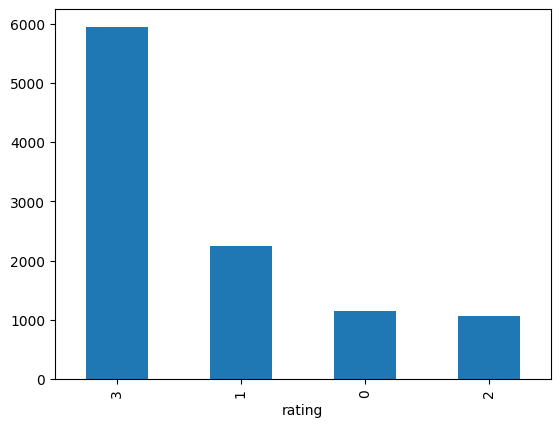

In [19]:
df['rating'].value_counts().plot.bar()

In [5]:
# Add a new column based on condition
# pythonic version - understand lambda?? 
df['passed_bechdel'] = df['rating'].apply(lambda x: 1 if x == 3 else 0)

# df['passed_bechdel'] = (df['column_to_check'] == 3).astype(int)



In [6]:
df.tail()

,title,imdbid,rating,year,id,passed_bechdel
10403,I Saw The TV Glow,15574270,3,2024,11454,1
10404,Dan Da Dan: First Encounter,33343397,3,2024,11456,1
10405,"Queen of Villains, The",21187072,3,2024,11458,1
10406,"Substance, The",17526714,1,2024,11459,0
10407,Abigail,27489557,3,2024,11463,1


<Axes: xlabel='passed_bechdel'>

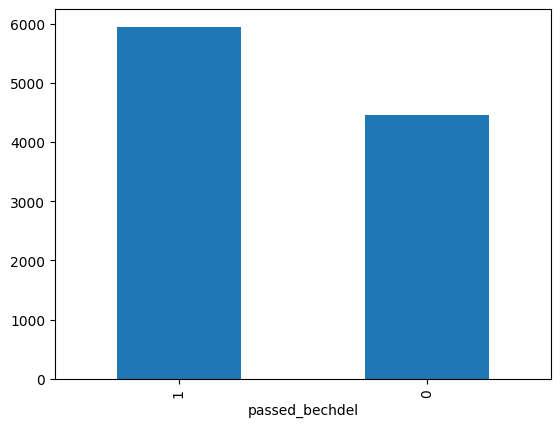

In [7]:
df['passed_bechdel'].value_counts().plot.bar()

In [8]:
#df['rating'].value_counts
df['passed_bechdel'].value_counts()

passed_bechdel
1    5950
0    4458
Name: count, dtype: int64

In [9]:
len(df['passed_bechdel'])

10408

In [10]:
df.head()

,title,imdbid,rating,year,id,passed_bechdel
0,Passage de Venus,3155794,0,1874,9602,0
1,La Rosace Magique,14495706,0,1877,9804,0
2,Sallie Gardner at a Gallop,2221420,0,1878,9603,0
3,Le singe musicien,12592084,0,1878,9806,0
4,Athlete Swinging a Pick,7816420,0,1881,9816,0


In [11]:
# I would like to make a list of movie names, which I would like to download the script from 
movie_titles = df['title']
imdb_id = df['imdbid']

In [12]:
imdb_id[0:50]

0      3155794
1     14495706
2      2221420
3     12592084
4      7816420
5      5459794
6      8588366
7      2075247
8      8133192
9      7411790
10     7541160
11     7754902
12     8361552
13     0392728
14     1758563
15     0343112
16     3274100
17     2116853
18     0466876
19     2116898
20     0361921
21     0416046
22     1202028
23     0416047
24     5285442
25     2116968
26     0241373
27     0241715
28     0241763
29     0241393
30     0241392
31     0241394
32     0241735
33     3201916
34     3508566
35     5447082
36     0000003
37     0000004
38     0000002
39     0241446
40     0234520
41     0242148
42     0241266
43     0000005
44     0229217
45     8419312
46     0000015
47     0229235
48     0309396
49     0309402
Name: imdbid, dtype: object

In [13]:
movie_titles[0:50]

0                                      Passage de Venus
1                                     La Rosace Magique
2                            Sallie Gardner at a Gallop
3                                     Le singe musicien
4                               Athlete Swinging a Pick
5                                       Buffalo Running
6                                   L&#39;homme machine
7                         Man Walking Around the Corner
8                                       Cockatoo Flying
9                       Child Carrying Flowers to Woman
10               Jumping Over a Man&#39;s Back-Leapfrog
11                             Man Riding Jumping Horse
12                               Baboon Climbing a Pole
13                                Roundhay Garden Scene
14                                     Accordion Player
15                        Traffic Crossing Leeds Bridge
16         Pferd und Reiter Springen uber ein Hindernis
17                                Brighton Stree

In [ ]:
# how do I match these movie titles or IDs to the correct movie script?

# testing movie script corpus